In [1]:
import os
# necessary when on deepnet server
os.environ['DISPLAY'] = ':0.0'

import numpy as np
from PIL import Image
from GFG import Ctx
from GFG.model import Nf
from pathlib import Path
from GFG.core import Camera

import matplotlib.pyplot as plt


In [39]:
nf = Nf.from_default()

### SETUP CAMERA + DEFINITION PARAMETERS
# Setup openGL context + camera
ctx = Ctx(hidden=True)
nf.attach(ctx)  # attach to openGL context
ctx._camera[0] = Camera(
    ctx.win, (112, 112), 4.,  # res, renderscale
    target=[-11.5644, -13.0381, 0],
    eye = [-11.5644, -13.0381, 400],
    up = [0, 1, 0],
    FOV = 50,
    near = 100.,
    far = 1000.
)
ctx.assign_camera(0)

76.75099999999999 29.186999999999998 -81


(-0.5, 111.5, 111.5, -0.5)

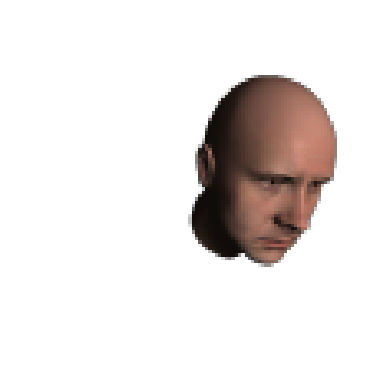

In [278]:
import random
x_rot = (-30, 30)
y_rot = (-30, 30)
z_rot = (-30, 30)
x_trans = (-100, 100)
y_trans = (-100, 100)
z_trans = (-100, 100)

xr = int(round(random.uniform(*x_rot)))
yr = int(round(random.uniform(*y_rot)))
zr = int(round(random.uniform(*z_rot)))
xt = int(round(random.uniform(*x_trans)))
yt = int(round(random.uniform(*y_trans)))
zt = int(round(random.uniform(*z_trans)))

xt = xt * (1 - (zt / 1000))
yt = yt * (1 - (zt / 1000))
print(xt, yt, zt)
# Reset to default position and apply actual translation/rotation
mu = nf.v[nf.groupvindex[nf.groupnames.index('face')]].mean(axis=0)
mu[-1] = nf.v[nf.groupvindex[nf.groupnames.index('head')]].mean(axis=0)[-1]
nf.skeleton.transform(x=xr, y=yr, z=zr, t=-mu, replace=True, order='txyz')
nf.skeleton.transform(x=0, y=0, z=0, t=mu, replace=False)
nf.skeleton.transform(x=0, y=0, z=0, t=[xt, yt, zt], replace=False)

img = ctx.render('image')
plt.imshow(img)
plt.axis('off')
#img


(-0.5, 111.5, 111.5, -0.5)

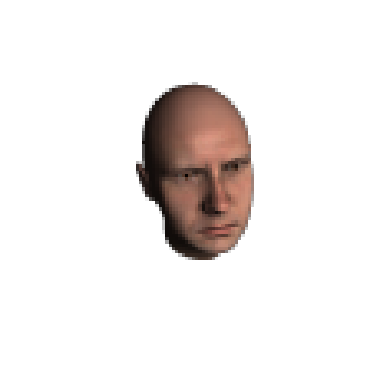

In [298]:
import random
from scipy.stats import pearsonr

xts, yts, zts = [], [], []

x_rot, y_rot, z_rot = (-30, 30), (-30, 30), (-30, 30)
x_trans, y_trans, z_trans = (-100, 100), (-100, 100), (-200, 0)
xr = int(round(random.uniform(*x_rot)))
yr = int(round(random.uniform(*y_rot)))
zr = int(round(random.uniform(*z_rot)))
xt = int(round(random.uniform(*x_trans)))
yt = int(round(random.uniform(*y_trans)))
zt = int(round(random.uniform(*z_trans)))

xt = xt * (zt / 70 + 1) * -1
yt = yt * (zt / 70 + 1) * -1

nf.skeleton.transform(x=xr, y=yr, z=zr, t=-mu, replace=True, order='txyz')
nf.skeleton.transform(x=0, y=0, z=0, t=mu, replace=False)
nf.skeleton.transform(x=0, y=0, z=0, t=[xt, yt, zt], replace=False)

img = ctx.render('image')
plt.imshow(img)
plt.axis("off")

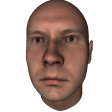

In [130]:
img = ctx.render('image')
img.save('../data/orig3.png')
img

In [ ]:
base_nf.transform_model(0, 0, 0, [0, 0, 0], order='txyz', replace=True)
base_nf.transform_model(15, 25, 0, [40, -10, 0], order='xyzt', replace=False)
img = ctx.render('image')
img.save('../data/rot.png')
img

In [ ]:
base_nf.transform_model(0, 0, 0, [0, 0, 0], order='txyz', replace=True)
base_nf.transform_model(15, 25, 0, [0, 0, 0], order='xyzt', replace=False)
img = ctx.render('image')

img_arr = np.array(img)
tform = transform.EuclideanTransform(translation=(120, 80))
img_arr = transform.warp(img_arr, tform.inverse)
img_arr *= 255
img = Image.fromarray(img_arr.astype(np.uint8))
img.convert('RGBA').save(str('../data/trans+rot.png'))
img


In [ ]:
ctx.set_lights(Path('../lights.yaml'))
ctx.transform_lights(45, 45, 0, [0, 0, 0])

base_nf.transform_model(0, 0, 0, [0, 0, 0], order='txyz', replace=True)
base_nf.transform_model(15, 25, 0, [0, 0, 0], order='xyzt', replace=False)
img = ctx.render('image')

img_arr = np.array(img)
tform = transform.EuclideanTransform(translation=(120, 80))
img_arr = transform.warp(img_arr, tform.inverse)
img_arr *= 255
img = Image.fromarray(img_arr.astype(np.uint8))
img.convert('RGBA').save(str('../data/trans+rot+lights.png'))
img

In [ ]:
ctx.set_lights(Path('../lights.yaml'))
ctx.transform_lights(45, 45, 45, [0, 0, 0])

base_nf.transform_model(0, 0, 0, [0, 0, 0], order='txyz', replace=True)
base_nf.transform_model(15, 25, 0, [0, 0, 0], order='xyzt', replace=False)
img = ctx.render('image')

img_arr = np.array(img)
tform = transform.EuclideanTransform(translation=(120, 80))
img_arr = transform.warp(img_arr, tform.inverse)
img_arr *= 255
bg_rgb = phase_scramble_image(img_arr.copy(), None, is_image=False, shuffle_phase=False, grayscale=False)
img_rgb, img_a = img_arr[..., :3], img_arr[..., 3, None] / 255.
img_arr = (img_rgb * img_a) + (bg_rgb * (1 - img_a))  # alpha blend
img_arr = np.dstack((img_arr, np.ones((512, 512)) * 255)).astype(np.uint8)
img = Image.fromarray(img_arr.astype(np.uint8))
img.convert('RGBA').save(str('../data/trans+rot+lights+bg.png'))
bg = Image.fromarray(bg_rgb.astype(np.uint8))
bg.convert('RGBA').save('../data/orig_background.png')